# Hastane Yönetimi için Veri Analitiği ve Operasyonel Verimlilik Raporu

 Bu projede, Kaggle’daki *Hospital Management Dataset* veri setini kullanarak hastane yönetim süreçlerini analiz edeceğiz ve operasyonel verimliliği artırmak için öneriler sunacağız. İlk olarak `appointments.csv` dosyasını inceleyerek randevu süreçlerini anlamaya odaklanacağız.

## appointments.csv Dosyasına Genel Bakış
 `appointments.csv` dosyasını yükleyerek randevu verilerinin yapısını inceleyeceğiz. Bu dosya, randevu yoğunluğu, iptal oranları ve doktor-hasta eşleşmeleri gibi operasyonel metrikler için temel oluşturacak. Sütunlar, veri tipleri ve eksik verileri kontrol ederek analiz için hangi alanlara odaklanacağımıza karar vereceğiz.

In [1]:
import pandas as pd

In [2]:
# appointments.csv dosyasını yüklüyoruz
df_appointments = pd.read_csv('/kaggle/input/hospital-management-dataset/appointments.csv')

In [3]:
# ilk 5 satırı görüntüleme
print("İlk 5 satır: ")
print(df_appointments.head())

İlk 5 satır: 
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  


In [4]:
# sütunlar veri tipleri
print("\nSütunlar ve Veri Tipleri:")
print(df_appointments.info())


Sütunlar ve Veri Tipleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None


In [5]:
# Eksik veri kontrolü
print("\nEksik Veri Sayısı:")
print(df_appointments.isnull().sum())


Eksik Veri Sayısı:
appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64


In [6]:
# Temel istatistikler
print("\nTemel İstatistikler:")
print(df_appointments.describe())


Temel İstatistikler:
       appointment_id patient_id doctor_id appointment_date appointment_time  \
count             200        200       200              200              200   
unique            200         48        10              158               40   
top              A001       P012      D005       2023-08-16         15:00:00   
freq                1         10        29                5                9   

       reason_for_visit   status  
count               200      200  
unique                5        4  
top             Checkup  No-show  
freq                 45       52  


## Randevu Durumu Analizi

Hastane operasyonlarının verimliliğini değerlendirmek için randevu durumlarını (`status`) inceleyeceğiz. Randevular "Scheduled", "No-show", "Cancelled" ve diğer durumlara sahip. Özellikle "No-show" oranları, kaynak israfını anlamak için kritik. Aşağıdaki pasta grafiği, randevu durumlarının dağılımını gösteriyor.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

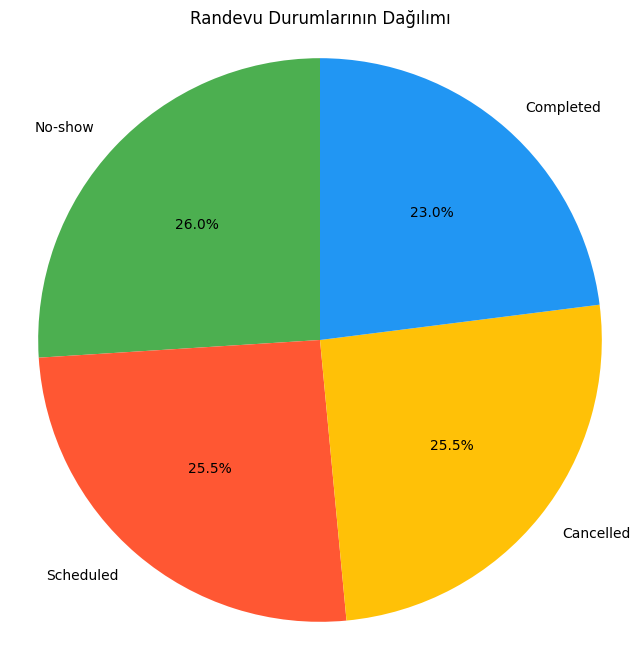

In [8]:
# Randevu durumlarının sayısını hesaplama
status_counts = df_appointments['status'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733', '#FFC107', '#2196F3'])
plt.title('Randevu Durumlarının Dağılımı')
plt.axis('equal')  # Daire şeklinde görünüm için
plt.show()

## Randevu Nedenleri ve No-show Analizi

Randevu durumlarının dağılımında %26’lık no-show oranı dikkat çekiyor. Bu oranı azaltmak için, hangi randevu nedenlerinin (`reason_for_visit`) daha fazla no-show ile ilişkili olduğunu inceleyeceğiz. Aşağıdaki çubuk grafik, her randevu nedeni için no-show oranlarını gösteriyor. Bu analiz, hastane yönetiminin hangi hizmetlere odaklanması gerektiğini belirlemede yardımcı olacak.

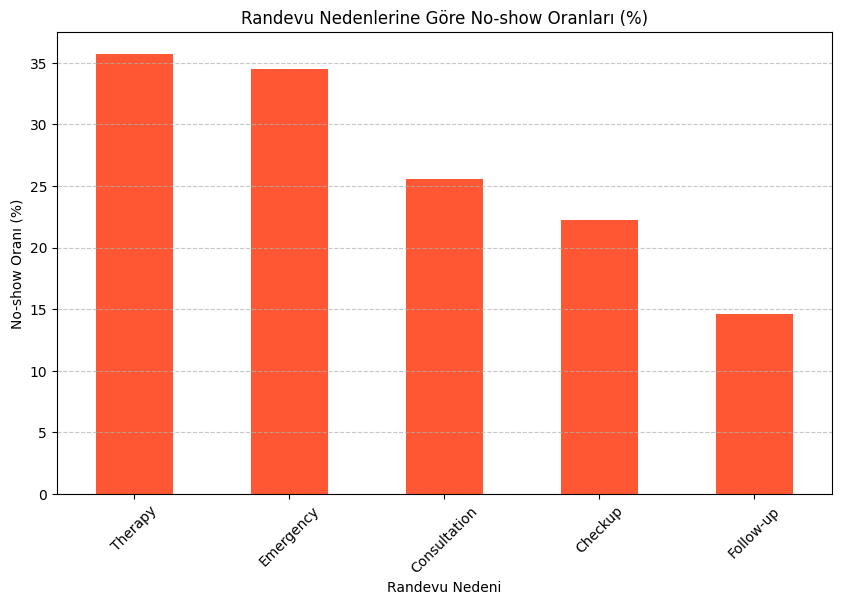

In [9]:
# No-show olan randevuları filtreleme
no_show = df_appointments[df_appointments['status'] == 'No-show']

# Randevu nedenlerine göre no-show sayısını hesaplama
no_show_by_reason = no_show['reason_for_visit'].value_counts()

# Tüm randevular için nedenlerin toplam sayısını hesaplama
total_by_reason = df_appointments['reason_for_visit'].value_counts()

# No-show oranlarını hesaplama
no_show_rates = (no_show_by_reason / total_by_reason * 100).sort_values(ascending=False)

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
no_show_rates.plot(kind='bar', color='#FF5733')
plt.title('Randevu Nedenlerine Göre No-show Oranları (%)')
plt.xlabel('Randevu Nedeni')
plt.ylabel('No-show Oranı (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### No-show Oranları Bulguları

Randevu nedenlerine göre no-show oranlarını incelediğimizde, aşağıdaki sonuçlar ortaya çıktı:
- **Therapy**: %35
- **Emergency**: %34
- **Consultation**: %26
- **Checkup**: %23-24
- **Followup**: %14

**İçgörüler**:
- Therapy ve Emergency randevularında no-show oranları oldukça yüksek, bu da kaynak israfına neden oluyor.
- Followup randevularında no-show oranı düşük, hastaların takip süreçlerine daha sadık olduğunu gösteriyor.
- Checkup randevuları en sık olmasına rağmen nispeten düşük no-show oranına sahip, bu da düzenli sağlık kontrollerine ilginin olduğunu gösteriyor.

**Öneriler**:
- Therapy ve Emergency için otomatik hatırlatma sistemleri (SMS, e-posta) devreye alınabilir.
- Therapy randevularının önemi hakkında hasta bilgilendirme kampanyaları düzenlenebilir.
- No-show oranı yüksek hizmetler için yedek hasta listesi oluşturularak boş slotlar optimize edilebilir.

## Zaman Bazlı Randevu Yoğunluğu Analizi

Hastane kaynaklarının etkin kullanımını optimize etmek için randevu yoğunluğunu zaman bazında inceleyeceğiz. Hangi saatlerde daha fazla randevu alındığını anlamak, doktor ve muayene odası planlamasını iyileştirmek için önemli. Aşağıdaki çubuk grafik, saat bazında randevu sayılarını gösteriyor.

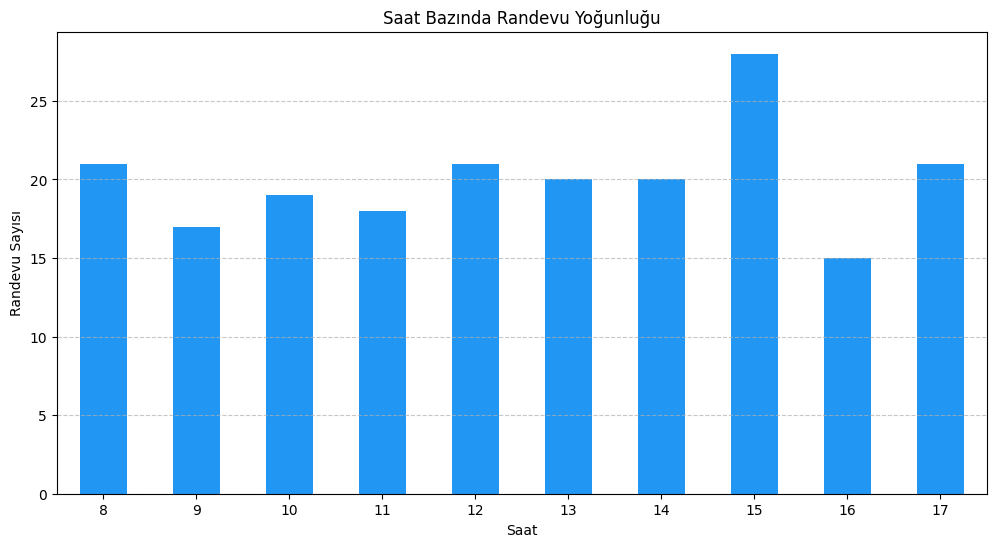

In [10]:
# appointment_time'ı datetime formatına çevirme ve sadece saati alma
df_appointments['appointment_time'] = pd.to_datetime(df_appointments['appointment_time'], format='%H:%M:%S')
df_appointments['hour'] = df_appointments['appointment_time'].dt.hour

# Saat bazında randevu sayısını hesaplama
hourly_counts = df_appointments['hour'].value_counts().sort_index()

# Çubuk grafik oluşturma
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='#2196F3')
plt.title('Saat Bazında Randevu Yoğunluğu')
plt.xlabel('Saat')
plt.ylabel('Randevu Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Saat Bazlı Randevu Yoğunluğu Bulguları

Saat bazında randevu yoğunluğunu analiz ettiğimizde, aşağıdaki sonuçlar ortaya çıktı:
- **15:00**, yaklaşık 20-25 randevu ile en yoğun saat.
- Diğer saatler daha eşit dağılmış, her biri 20’den az randevu içeriyor.

**İçgörüler**:
- 15:00’deki yüksek randevu sayısı, bu saatte kaynakların (doktorlar, muayene odaları) tam kapasite kullanıldığını gösteriyor. Bu, hasta bekleme sürelerini artırabilir.
- Sabah erken veya akşam geç saatler, daha az yoğun ve kaynakların verimsiz kullanıldığı zaman dilimleri olabilir.

**Öneriler**:
- 15:00’deki yoğunluğu azaltmak için randevuları sabah veya akşam saatlerine kaydırmak adına teşvikler (ör. indirimli ücretler) sunulabilir.
- Yoğun saatlerde ek muayene odası veya geçici doktor takviyesi ile hasta memnuniyeti artırılabilir.
- Yoğun saatlerde randevu aralıklarını optimize ederek bekleme süreleri azaltılabilir.

## Doktor İş Yükü Analizi

Hastane kaynaklarının verimli kullanımı için doktorların iş yükünü inceleyeceğiz. Hangi doktorların daha fazla randevu aldığını anlamak, iş yükü dağılımını dengelemek ve hasta memnuniyetini artırmak için kritik. Aşağıdaki çubuk grafik, her doktorun randevu sayısını gösteriyor.

In [11]:
# Doktor bazında randevu sayısını hesaplama
doctor_counts = df_appointments['doctor_id'].value_counts()

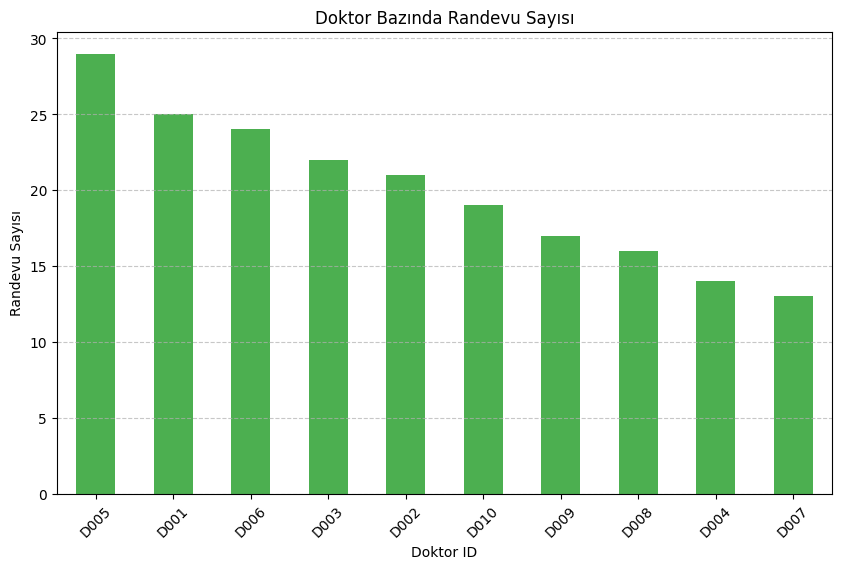

In [12]:
# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
doctor_counts.plot(kind='bar', color='#4CAF50')
plt.title('Doktor Bazında Randevu Sayısı')
plt.xlabel('Doktor ID')
plt.ylabel('Randevu Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Doktor İş Yükü Bulguları

Doktor bazında randevu sayılarını analiz ettiğimizde, aşağıdaki sonuçlar ortaya çıktı:
- **D005**, yaklaşık 30 randevu ile en yoğun doktor.
- Diğer doktorların randevu sayıları D005’ten sonra yavaş yavaş azalıyor.

**İçgörüler**:
- D005’in yüksek randevu sayısı, bu doktorun aşırı yüklendiğini ve hasta bekleme sürelerinin uzayabileceğini gösteriyor.
- Daha az randevu alan doktorlar, kaynakların verimsiz kullanıldığını işaret edebilir.
- İş yükü dengesizliği, hasta memnuniyetini ve operasyonel verimliliği olumsuz etkileyebilir.

**Öneriler**:
- D005’in randevularının bir kısmını diğer doktorlara yönlendirmek için hasta atama sistemi optimize edilebilir.
- Eğer D005 belirli bir uzmanlık alanında yoğunlaşmışsa, bu alana ek doktor takviyesi yapılabilir.
- Daha az yoğun doktorların randevu slotları, özellikle popüler saatlerde (ör. 15:00) artırılabilir.

## Gün Bazlı Randevu Yoğunluğu Analizi

Hastane operasyonlarının verimliliğini artırmak için randevu yoğunluğunu haftanın günlerine göre inceleyeceğiz. Hangi günlerde daha fazla randevu alındığını anlamak, kaynak planlamasını optimize etmek için kritik. Aşağıdaki çubuk grafik, haftanın günlerine göre randevu sayılarını gösteriyor.

In [13]:
# appointment_date'i datetime formatına çevirme
df_appointments['appointment_date'] = pd.to_datetime(df_appointments['appointment_date'])

# Haftanın günlerini çıkarma (0=Pazartesi, 6=Pazar)
df_appointments['day_of_week'] = df_appointments['appointment_date'].dt.dayofweek

# Gün isimlerini ekleme
day_names = {0: 'Pazartesi', 1: 'Salı', 2: 'Çarşamba', 3: 'Perşembe', 4: 'Cuma', 5: 'Cumartesi', 6: 'Pazar'}
df_appointments['day_name'] = df_appointments['day_of_week'].map(day_names)

In [14]:
# Gün bazında randevu sayısını hesaplama
day_counts = df_appointments['day_name'].value_counts().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar'])

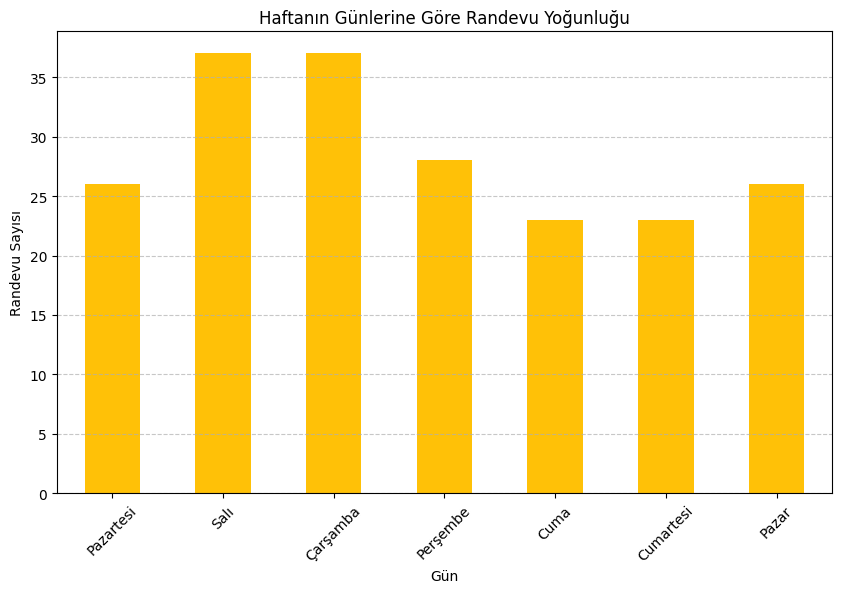

In [15]:
# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='#FFC107')
plt.title('Haftanın Günlerine Göre Randevu Yoğunluğu')
plt.xlabel('Gün')
plt.ylabel('Randevu Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gün Bazlı Randevu Yoğunluğu Bulguları

Haftanın günlerine göre randevu yoğunluğunu analiz ettiğimizde, aşağıdaki sonuçlar ortaya çıktı:
- **Salı ve Çarşamba**, her biri 35’ten fazla randevu ile en yoğun günler.
- Diğer günler daha az randevu içeriyor, özellikle hafta sonu daha sakin olabilir.

**İçgörüler**:
- Salı ve Çarşamba’daki yüksek yoğunluk, bu günlerde kaynakların (doktorlar, muayene odaları) tam kapasite kullanıldığını gösteriyor. Bu, hasta bekleme sürelerini artırabilir.
- Daha az yoğun günler (ör. Pazartesi, Cuma, Cumartesi), kaynakların verimsiz kullanıldığı zaman dilimleri olabilir.

**Öneriler**:
- Salı ve Çarşamba için ek muayene odası veya geçici doktor takviyesi ile yoğunluk azaltılabilir.
- Daha az yoğun günlere randevuları kaydırmak için teşvikler (ör. indirimli ücretler, esnek saatler) sunulabilir.
- Yoğun günlerde randevu aralıklarını optimize ederek hasta bekleme süreleri kısaltılabilir.